In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_excel('../data/data_fe.xlsx', index_col=0)

In [48]:
pd.options.display.max_columns = None

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=2,test_size=0.2)

In [53]:
scaler.fit(x_train)

StandardScaler()

In [54]:
x_train_std = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test_std = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [55]:
# pickel scaler and save in a file
import pickle
pickle.dump(scaler, open('../models/scaler.pkl', 'wb'))

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_logistic = LogisticRegression()

In [57]:
model_logistic.fit(x_train_std, y_train)

LogisticRegression()

In [58]:
# save logistic model
pickle.dump(model_logistic, open('../models/logistic_model.pkl', 'wb'))

In [59]:
model_logistic.score(x_test_std, y_test)

0.9987742171705112

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay,roc_auc_score

In [61]:
y_hat = model_logistic.predict(x_test_std)

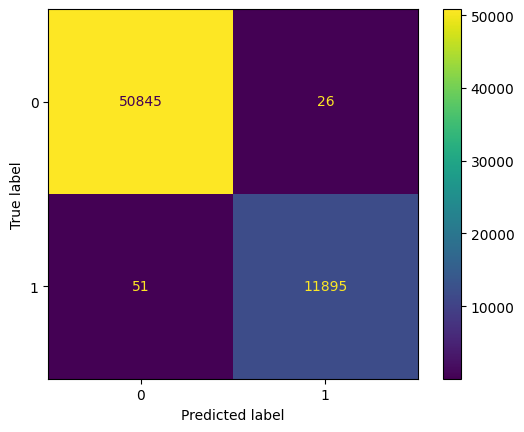

In [62]:
cm = confusion_matrix(y_test, y_hat)
ConfusionMatrixDisplay(cm).plot()

In [63]:
accuracy_score(y_test, y_hat)

0.9987742171705112

In [64]:
pred_prob1 = model_logistic.predict_proba(x_test_std)

In [65]:
pred_prob1

array([[4.35221340e-05, 9.99956478e-01],
       [9.99209161e-01, 7.90838602e-04],
       [9.99972849e-01, 2.71510724e-05],
       ...,
       [9.99901919e-01, 9.80812150e-05],
       [5.06241592e-04, 9.99493758e-01],
       [9.99933124e-01, 6.68755249e-05]])

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [67]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score1

np.float64(0.9999754370939269)

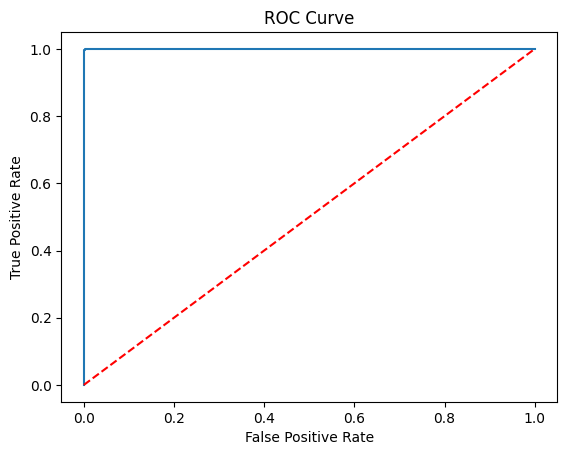

In [68]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
plt.plot(fpr1, tpr1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

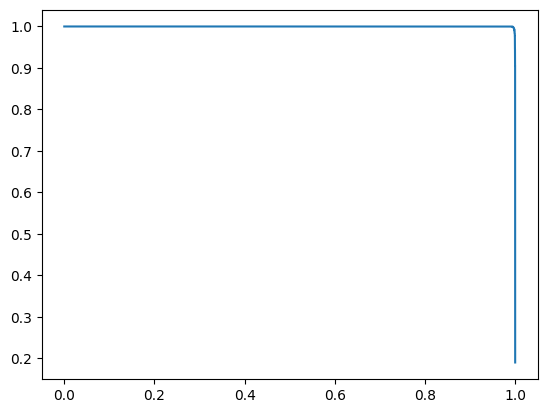

In [69]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_prob1[:,1])
# threshold_boundary = thresholds.shape[0]
# plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
# plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')
plt.plot(recalls, precisions)
# plt.plot([0, 1], [0, 1],'r--')
plt.show()